In [789]:
from sklearn.datasets import make_blobs, make_moons
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from collections import deque
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import rbf_kernel

In [790]:
moon_data = make_moons()

In [791]:
x,y = make_moons()

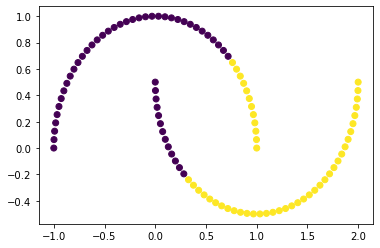

In [801]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(x)
c = kmeans.predict(x)
plt.scatter(x[:,0],x[:,1],c = c)
plt.show()

In [802]:
data = x

In [767]:
blob_data = make_blobs(n_samples = 1000,
                 n_features = 2,
                 centers = 2,
                 return_centers = True,
                 random_state = 42)
x, y, c, centers = blob_data[0][:,0], blob_data[0][:,1], blob_data[1], blob_data[2]
data = np.stack([x,y], axis = 1)

In [803]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [804]:
def adjacency_graph(data, k):
    A = kneighbors_graph(data, n_neighbors = k).toarray()
    # Make the graph undirected
    A = np.logical_or(A,A.T).astype(int)
    return A

def similarity_graph(data):
    S = rbf_kernel(data, gamma = 1)
    return S

def weight_matrix(A, S):
    W = np.multiply(A,S)
    return W

def degree_matrix(W):
    degrees = W.sum(axis = 1)
    D = np.diag(degrees)
    return D

def unnormalized_graph_Laplacian(D, W):
    L = D - W
    return L

In [805]:
A = adjacency_graph(data, 10)
S = similarity_graph(data)
W = weight_matrix(A, S)
D = degree_matrix(W)

L = unnormalized_graph_Laplacian(D, W)

In [806]:
U, sigma, _ = linalg.svd(L, full_matrices = False, lapack_driver = 'gesvd')

In [807]:
Usubset = U[:,-2:]

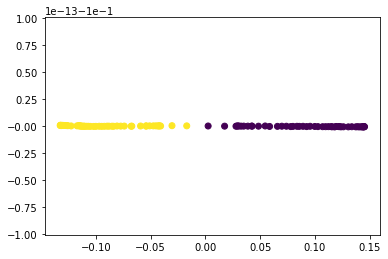

In [808]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(Usubset)
c = kmeans.predict(Usubset)
plt.scatter(Usubset[:,0],Usubset[:,1],c = c)
plt.show()

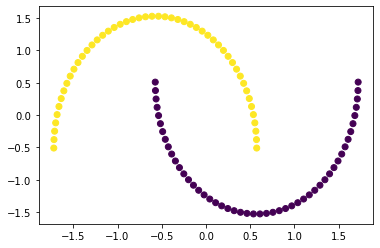

In [809]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(Usubset)
c = kmeans.predict(Usubset)
plt.scatter(data[:,0],data[:,1],c = c)
plt.show()